<a href="https://colab.research.google.com/github/QED137/Machine-Learning-Project-on-Cherenkov-gamma-telescope-/blob/main/mL_gamma_cerenkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()


Saving magic04.data to magic04.data


In [4]:
cols =["fLenght", "fWidht", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM2Tans", "fAlpha", "fDist", "class"]
df =pd.read_csv("magic04.data", names = cols)
df.head()

,fLenght,fWidht,fSize,fConc,fConc1,fAsym,fM3Long,fM2Tans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['class']=(df['class']=="g").astype(int)
print(df.head())
print(df.tail())

    fLenght    fWidht   fSize   fConc  fConc1     fAsym  fM3Long  fM2Tans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  
        fLenght   fWidht   fSize   fConc  fConc1     fAsym   fM3Long  fM2Tans  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   2.8766   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853  -2.9632   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562  -9.4662   
19018  120.5135  76.9018  3.9939 

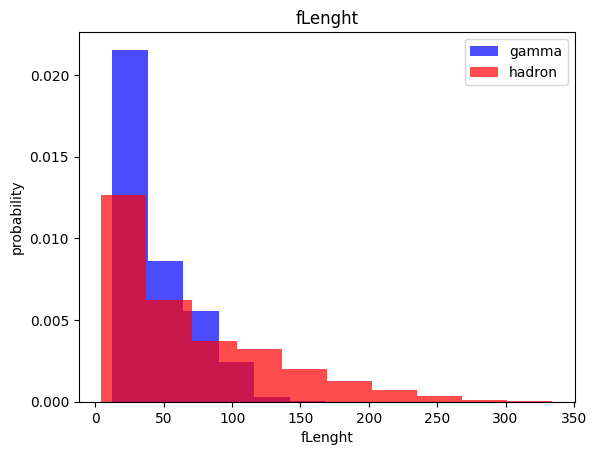

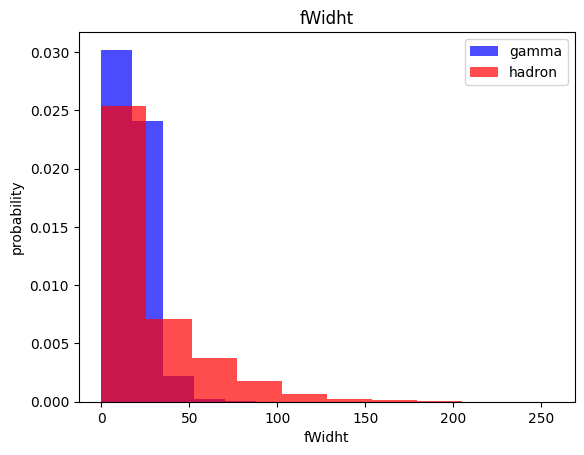

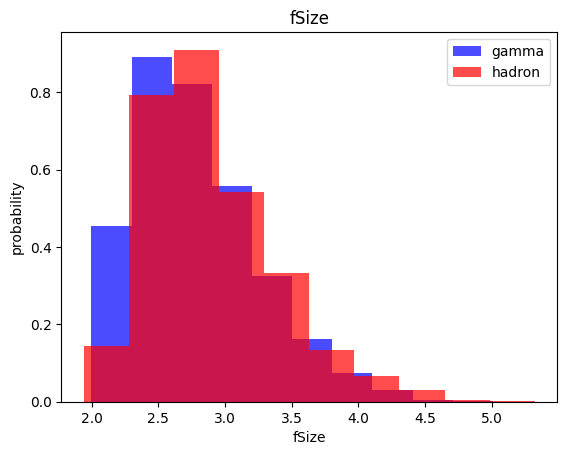

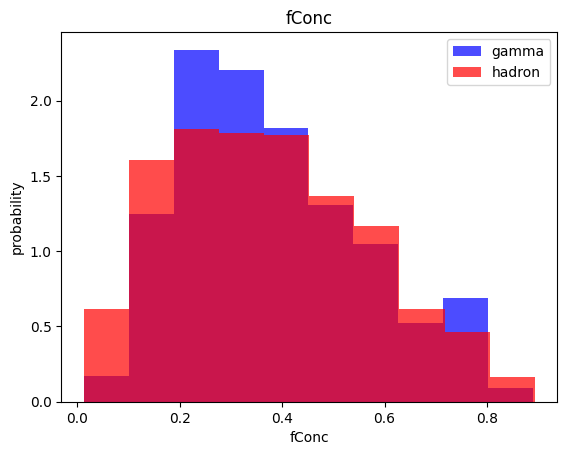

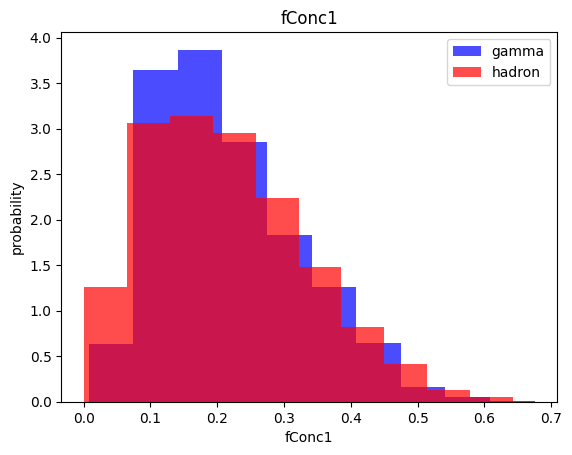

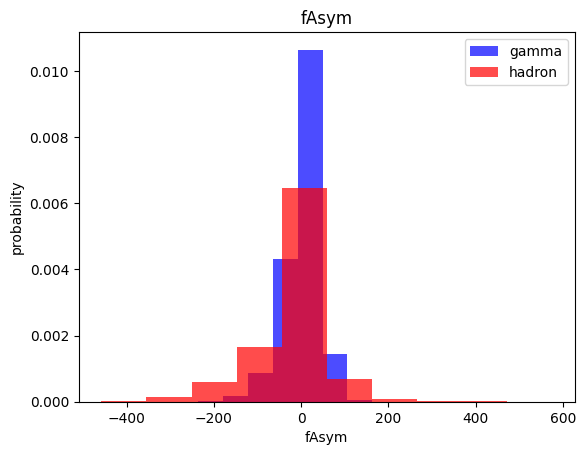

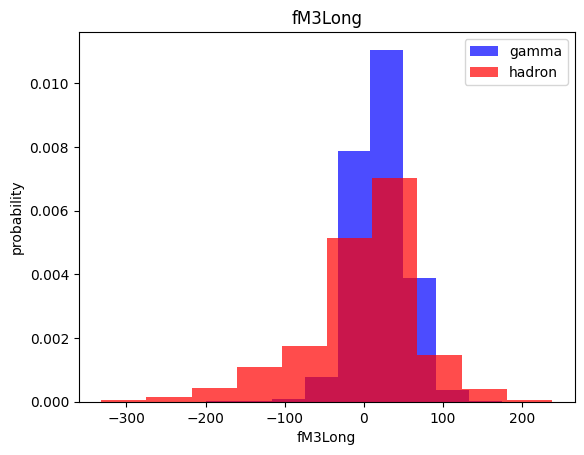

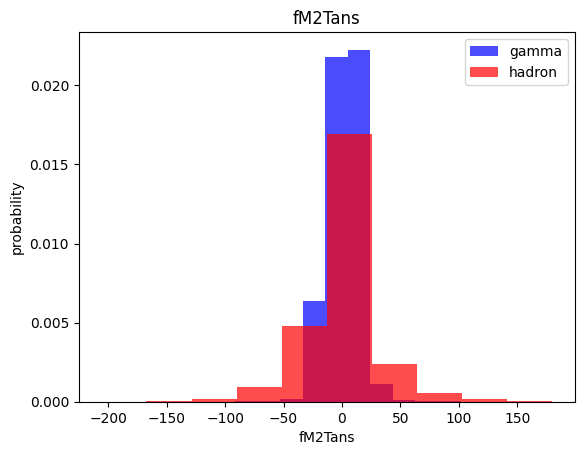

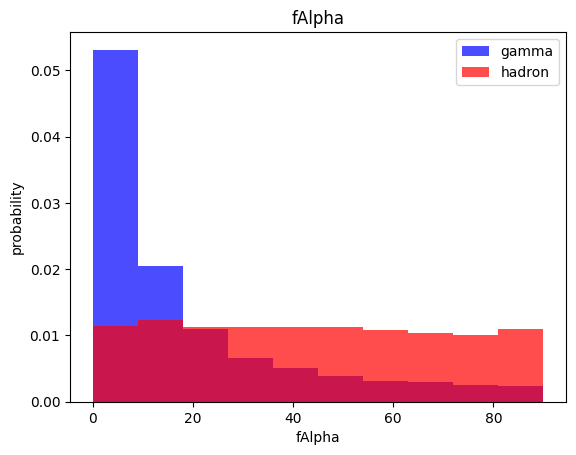

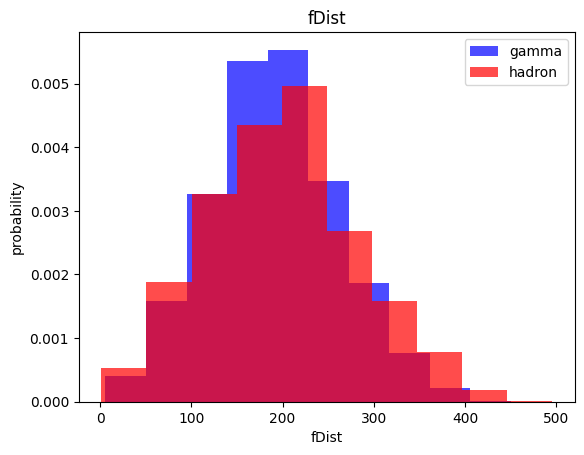

In [7]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)

  plt.legend()
  plt.show()


Train validation and test data

In [8]:
from sklearn.model_selection import train_test_split
# Randomly shuffle the data (optional but recommended)
df_shuffled = df.sample(frac=1, random_state=42)  # Set a seed for reproducibility

# Split the data into training, validation, and test sets with desired ratios
train_size = 0.6  # 60% for training
val_size = 0.2  # 20% for validation
test_size = 0.2  # 20% for testing

train, val_test = train_test_split(df_shuffled, test_size=val_size+test_size, random_state=42)
train, test = train_test_split(train, test_size=test_size / (val_size+test_size), random_state=42)
#print(len(train))

### **Scaling**

In [9]:
import numpy as np

def scale_dataset(data, oversample=False):
    if isinstance(data, pd.DataFrame):
        x = data[data.columns[:-1]].values
        y = data[data.columns[-1]].values
    else:
        x = data[:, :-1]
        y = data[:, -1]

    # Scale features using StandardScaler
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(x)

    if oversample:
        # Perform oversampling if specified
        ros = RandomOverSampler()
        x_scaled, y = ros.fit_resample(x_scaled, y)

    # Concatenate scaled features and target variable
    data_combined = np.hstack((x_scaled, np.reshape(y, (-1, 1))))

    # Return scaled and oversampled dataset, along with original features and target
    return data_combined, x_scaled, y

# Example usage:
train_combined, train_x_scaled, train_y = scale_dataset(train, oversample=True)


In [10]:
print(len(train_x_scaled))

7414


In [11]:
train, train_x, train_y = scale_dataset(train, oversample=True)
val_test, val_test_x, val_test_y = scale_dataset(val_test, oversample=False)
test, test_x, test_y = scale_dataset(test, oversample=False)

In [ ]:
#print((train['class'] == 1).sum())
#print((train['class'] == 0).sum())


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# **kNN model**

# kNN (K-Nearest Neighbors) Model

The kNN algorithm is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It is a type of instance-based learning where the prediction is made based on the majority class or average of the k-nearest data points in the feature space.

## How it Works
- For a given query instance, the algorithm identifies the k-nearest neighbors based on a distance metric (e.g., Euclidean distance) in the feature space.
- For classification, the majority class among the k-nearest neighbors is assigned to the query instance.
- For regression, the average of the target values of the k-nearest neighbors is used as the predicted value for the query instance.

## Key Parameters
- `k`: The number of nearest neighbors to consider. It's a hyperparameter that needs to be tuned based on the dataset and problem at hand.
- Distance metric: The choice of distance metric (e.g., Euclidean distance, Manhattan distance) can impact the algorithm's performance.

## Pros and Cons
- **Pros**:
  - Simple and easy to understand.
  - No training phase; the prediction is based on stored instances.
- **Cons**:
  - Computationally expensive during prediction, especially for large datasets.
  - Sensitivity to the choice of distance metric and value of `k`.

## Usage
1. Choose a value for `k`.
2. Train the kNN model on labeled training data.
3. For each query instance, calculate distances to all training instances.
4. Select the k-nearest neighbors.
5. For classification, assign the majority class label among the k-nearest neighbors. For regression, compute the average of the target values.


In [12]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model(X_train, y_train, X_test, k):
  """
  This function trains a KNN classification model and predicts labels for new data.

  Args:
      X_train (numpy.ndarray): Training data features.
      y_train (numpy.ndarray): Training data labels.
      X_test (numpy.ndarray): Testing data features.
      k (int): Number of neighbors to consider for classification.

  Returns:
      numpy.ndarray: Predicted labels for the test data.
  """

  # Create the KNN classifier model
  knn_model = KNeighborsClassifier(n_neighbors=k)

  # Train the model on the training data
  knn_model.fit(train_x, train_y)

  # Predict labels for the test data
  y_pred = knn_model.predict(test_x)

  return y_pred

# Example usage (assuming you have your data in NumPy arrays)
#X_train, X_test, y_train, y_test = # Load your training and testing data
k = 5  # Choose the number of neighbors (experiment with different values)

# Predict labels for the test data using the KNN model
kNN_y_pred = knn_model(train_x, train_y, test_x, k)

# Evaluate the model performance (optional)
# You can use metrics like accuracy, precision, recall, etc.

print("Predicted labels:", kNN_y_pred)

Predicted labels: [1 0 1 ... 1 0 0]


**Knn**

In [13]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=1)

In [14]:
kNN_y_pred=knn_model.predict(test_x)

# Visualizing KNN Model Performance

This notebook demonstrates how to visualize various aspects of a KNN (K-Nearest Neighbors) model's performance using Python.

## Functions Provided
- `plot_confusion_matrix`: Generates and displays a confusion matrix.
- `plot_roc_curve`: Plots the Receiver Operating Characteristic (ROC) curve.
- `plot_precision_recall_curve`: Plots the precision-recall curve.
- `plot_decision_boundaries`: Visualizes decision boundaries for a 2D dataset.
- `plot_learning_curve`: Displays the learning curve.

## Usage
1. Train and test your KNN model.
2. Import the necessary libraries.
3. Call the provided visualization functions with appropriate parameters.



In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

def plot_confusion_matrix(test_y, y_pred):
    cm = confusion_matrix(test_y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(test_y, y_pred):
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(test_y, y_pred):
    precision, recall, _ = precision_recall_curve(test_y, y_pred)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_decision_boundaries(train_x, train_y, knn_model):
    if train_x.shape[1] != 2:
        print("Decision boundaries can only be plotted for 2D datasets.")
        return
    x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
    y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    plt.figure()
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=20, edgecolor='k')
    plt.title('Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_learning_curve(train_x, train_y, knn_model):
    train_sizes, train_scores, test_scores = learning_curve(knn_model, train_x, train_y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()


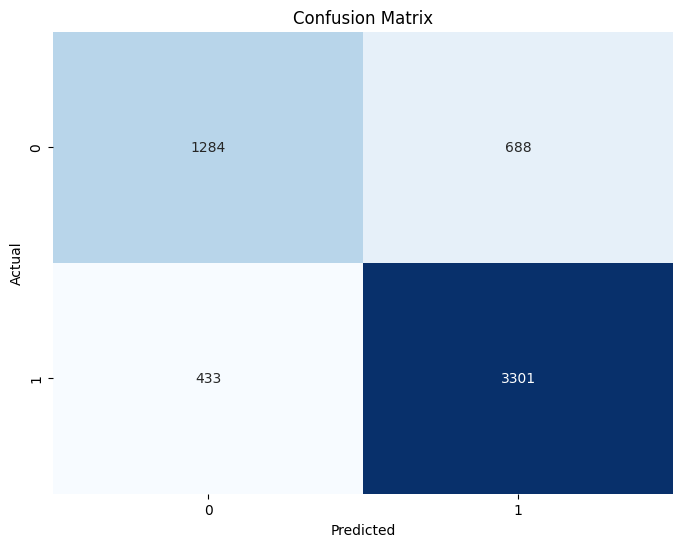

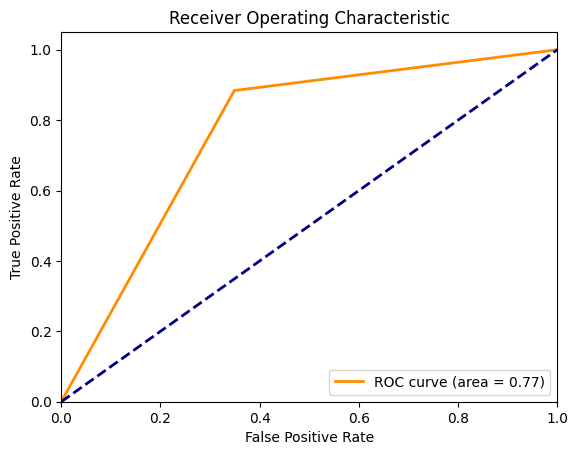

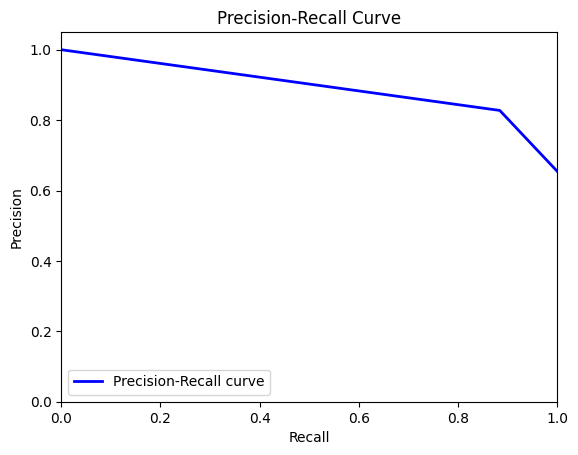

Decision boundaries can only be plotted for 2D datasets.


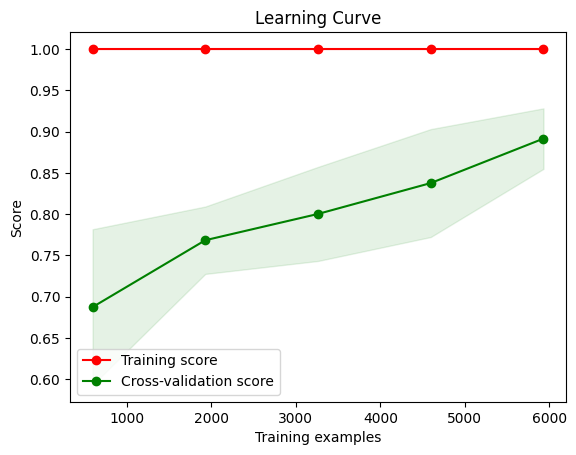

In [16]:
# Assuming you have already trained and tested your KNN model and have the necessary data
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_x, train_y)

# Make predictions on the test set
y_pred = knn_model.predict(test_x)

# Call the modular functions to visualize the results
plot_confusion_matrix(test_y, y_pred)
plot_roc_curve(test_y, y_pred)
plot_precision_recall_curve(test_y, y_pred)
plot_decision_boundaries(train_x, train_y, knn_model)
plot_learning_curve(train_x, train_y, knn_model)


# **Destermining best Neighbor value**
The code determines the optimal value of the n_neighbors parameter for a KNN (K-Nearest Neighbors) classifier using cross-validation. It starts by defining a range of values for n_neighbors. For each value of n_neighbors, the code performs cross-validation with 5 folds and calculates the mean validation scores for precision, recall, and F1-score. These scores are then plotted against the number of neighbors to visualize how the model's performance varies with different values of n_neighbors. Finally, the code determines the optimal value of n_neighbors based on the highest mean F1-score and prints it.

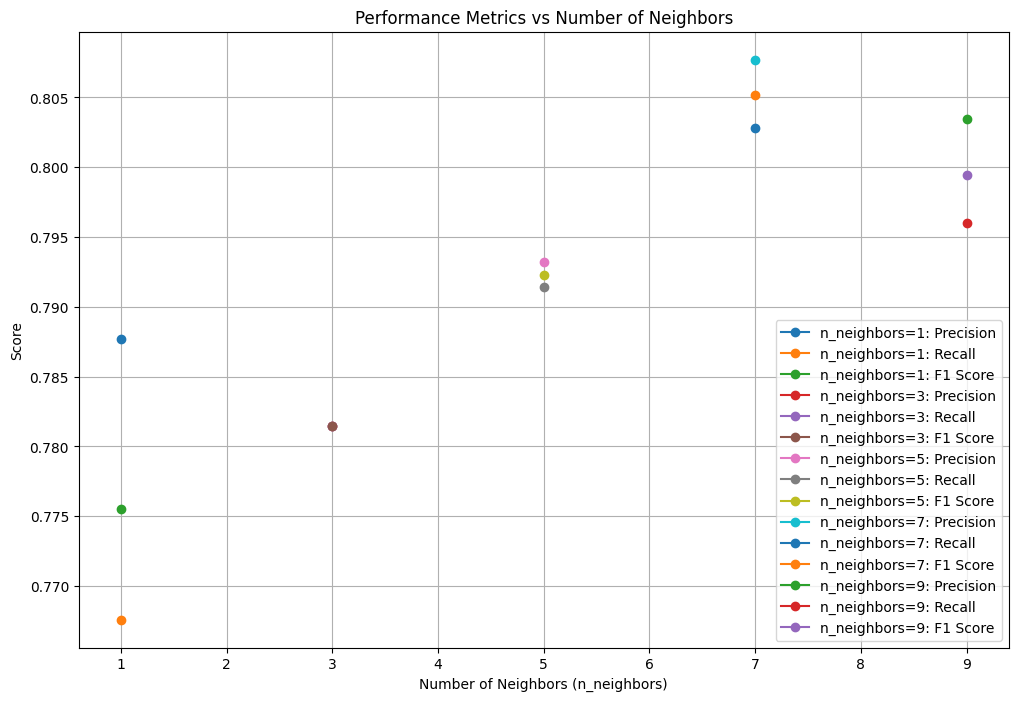

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define a range of values for n_neighbors
neighbors_values = [1, 3, 5, 7, 9]

# Store the classification reports for each n_neighbors value
classification_reports = {}

# Iterate over each value of n_neighbors
for n_neighbors in neighbors_values:
    # Instantiate the KNN model with the current value of n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the KNN model
    knn_model.fit(train_x, train_y)

    # Make predictions on the test set
    y_pred = knn_model.predict(test_x)

    # Calculate and store the classification report for the current n_neighbors value
    classification_reports[n_neighbors] = classification_report(test_y, y_pred, output_dict=True)

# Plotting the results
# You can customize the plots based on the metrics you're interested in
plt.figure(figsize=(12, 8))
for n_neighbors, report in classification_reports.items():
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    plt.plot(n_neighbors, precision, marker='o', label=f'n_neighbors={n_neighbors}: Precision')
    plt.plot(n_neighbors, recall, marker='o', label=f'n_neighbors={n_neighbors}: Recall')
    plt.plot(n_neighbors, f1_score, marker='o', label=f'n_neighbors={n_neighbors}: F1 Score')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


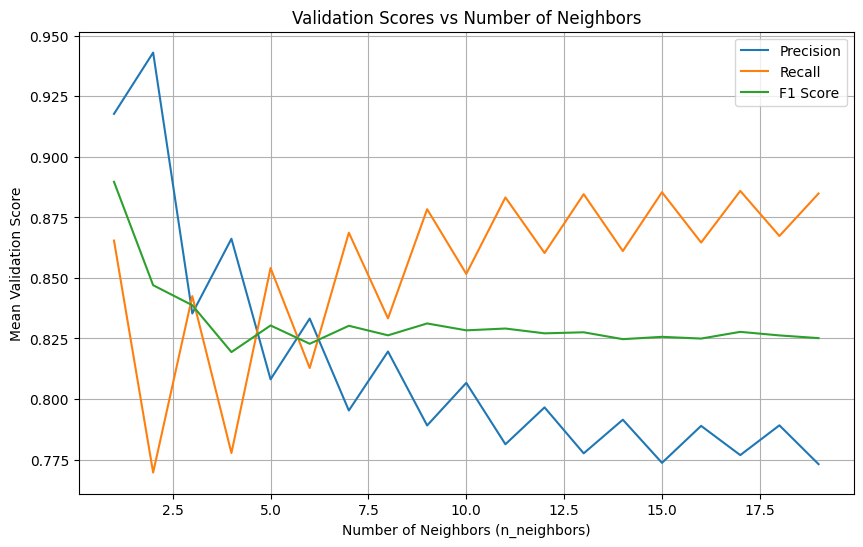

Optimal value of n_neighbors: 1


In [18]:
#choosing the best neighbor value
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Define a range of values for n_neighbors
neighbors_values = range(1, 20)

# Store mean validation scores for each value of n_neighbors
mean_scores = {'precision': [], 'recall': [], 'f1_score': []}

# Iterate over each value of n_neighbors
for n_neighbors in neighbors_values:
    # Instantiate the KNN model with the current value of n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Perform cross-validation with 5 folds and multiple scoring metrics
    scores = cross_validate(knn_model, train_x, train_y, cv=5, scoring=('precision', 'recall', 'f1'), return_train_score=False)

    # Store mean validation scores for the current value of n_neighbors
    mean_scores['precision'].append(np.mean(scores['test_precision']))
    mean_scores['recall'].append(np.mean(scores['test_recall']))
    mean_scores['f1_score'].append(np.mean(scores['test_f1']))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_values, mean_scores['precision'], label='Precision')
plt.plot(neighbors_values, mean_scores['recall'], label='Recall')
plt.plot(neighbors_values, mean_scores['f1_score'], label='F1 Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Validation Score')
plt.title('Validation Scores vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Determine the optimal value of n_neighbors based on the highest mean validation score
optimal_n_neighbors = neighbors_values[np.argmax(mean_scores['f1_score'])]
print(f'Optimal value of n_neighbors: {optimal_n_neighbors}')


In [19]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1972
           1       0.85      0.88      0.86      3734

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.82      0.82      5706



# Naive BayesModel

# Naive Bayes Model

The Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' theorem with the assumption of independence between features. It is widely used for classification tasks and is particularly efficient for large datasets with high-dimensional feature spaces.

## How it Works
- The algorithm calculates the probability of each class label given the input features using Bayes' theorem.
- It assumes that the features are conditionally independent given the class label, which simplifies the calculation.
- For prediction, the class with the highest posterior probability (probability of the class given the input features) is selected.

## Types of Naive Bayes Classifiers
1. **Gaussian Naive Bayes**: Assumes that continuous features follow a Gaussian (normal) distribution.
2. **Multinomial Naive Bayes**: Suitable for discrete features (e.g., word counts in text classification).
3. **Bernoulli Naive Bayes**: Assumes that features are binary (e.g., presence or absence of a feature).

## Key Advantages
- Simple and easy to implement.
- Efficient for large datasets and high-dimensional feature spaces.
- Works well with categorical and numerical data.

## Key Assumptions
- Strong assumption of feature independence, which may not hold true in real-world datasets.
- Sensitive to irrelevant features or features with strong correlations.

## Usage
1. Prepare the dataset by scaling or preprocessing the features.
2. Choose the appropriate type of Naive Bayes classifier based on the nature of the features.
3. Train the Naive Bayes model on the labeled training data.
4. Evaluate the model's performance on validation or test data using appropriate metrics (e.g., accuracy, precision, recall).
5. Make predictions on new, unseen data using the trained model.


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# Train Naive Bayes classifier
nb_classifier = GaussianNB().fit(train_x, train_y)

# Make predictions on validation set
nb_val_pred = nb_classifier.predict(val_test_x)

# Evaluate the model
accuracy = accuracy_score(val_test_y, nb_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(val_test_y, nb_val_pred))

# Perform McNemar's test
contingency_table = pd.crosstab(val_test_y, nb_val_pred, margins=False)
result = mcnemar(contingency_table)

# Print the result
print("McNemar's Test:")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)



Validation Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.40      0.51      2717
           1       0.73      0.90      0.81      4891

    accuracy                           0.72      7608
   macro avg       0.71      0.65      0.66      7608
weighted avg       0.72      0.72      0.70      7608

McNemar's Test:
Statistic: 465.0
p-value: 6.27902164301033e-152


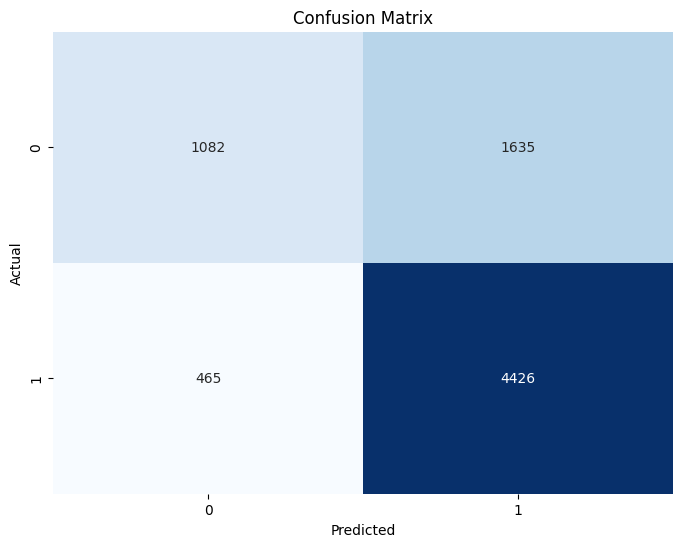

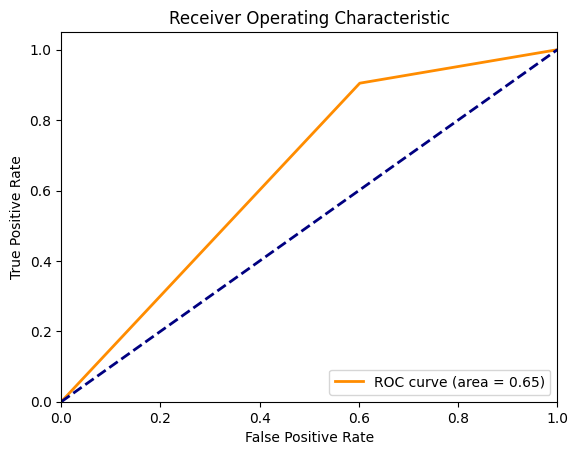

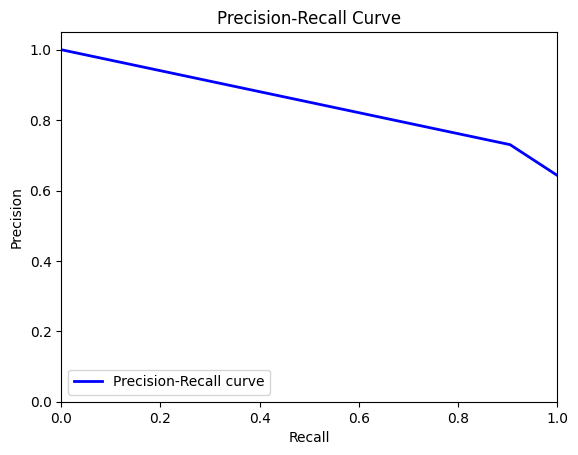

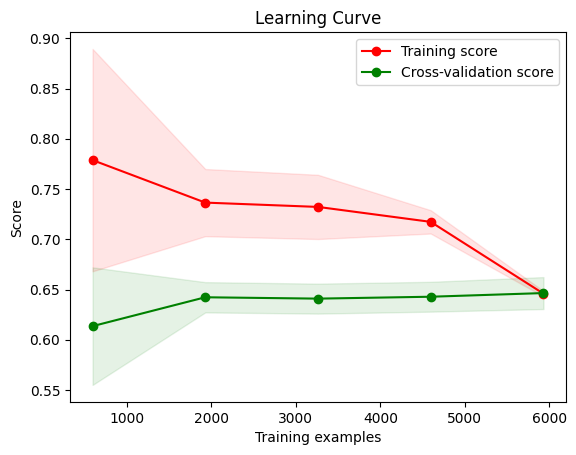

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

# Function to plot confusion matrix
def plot_confusion_matrix(test_y, y_pred):
    cm = confusion_matrix(test_y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(test_y, y_pred):
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall_curve(test_y, y_pred):
    precision, recall, _ = precision_recall_curve(test_y, y_pred)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Function to plot learning curve
def plot_learning_curve(train_x, train_y, nb_classifier):
    train_sizes, train_scores, test_scores = learning_curve(nb_classifier, train_x, train_y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Assuming you have already trained and tested your Naive Bayes model and have the necessary data
# Train Naive Bayes classifier
nb_classifier = GaussianNB().fit(train_x, train_y)

# Make predictions on validation set
val_pred = nb_classifier.predict(val_test_x)

# Call the modular functions to visualize the results
plot_confusion_matrix(val_test_y, val_pred)
plot_roc_curve(val_test_y, val_pred)
plot_precision_recall_curve(val_test_y, val_pred)
plot_learning_curve(train_x, train_y, nb_classifier)


# comparing between kNN model and Naive Bayes

TypeError: plot_confusion_matrix() takes 2 positional arguments but 4 were given

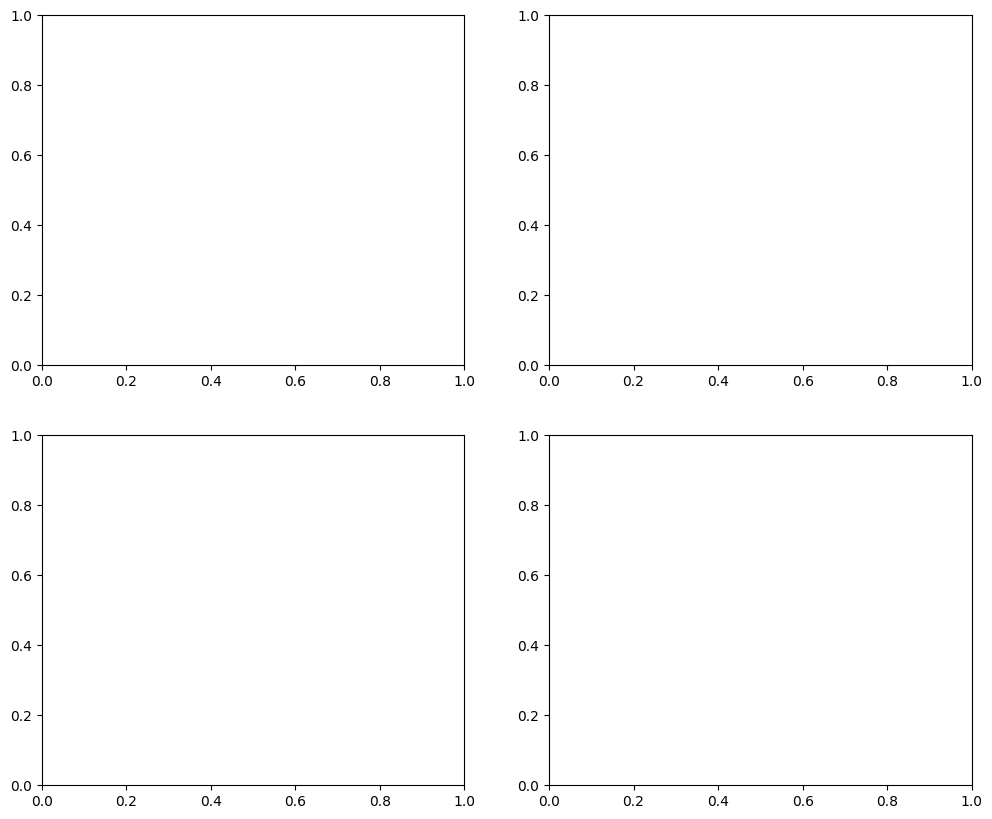

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot confusion matrix for kNN model
plot_confusion_matrix(axs[0, 0], "kNN Confusion Matrix", val_test_y, kNN_y_pred)

# Plot ROC curve for kNN model
plot_roc_curve(axs[0, 1], "kNN ROC Curve", val_test_y, kNN_y_pred)

# Plot confusion matrix for Naive Bayes model
plot_confusion_matrix(axs[1, 0], "Naive Bayes Confusion Matrix", val_test_y, nb_val_pred)

# Plot ROC curve for Naive Bayes model
plot_roc_curve(axs[1, 1], "Naive Bayes ROC Curve", val_test_y, nb_val_pred)

plt.tight_layout()
plt.show()

# SVM

Support Vector Machine

In [23]:
from sklearn.svm import SVC

In [36]:

#svm_model=SVC()
svm_model = SVC(kernel='rbf', random_state=42)

svm_model=svm_model.fit(train_x, train_y)
svm_y_pred=svm_model.predict(test_x)
print(classification_report(test_y,svm_y_pred ))

In [39]:
# Calculate accuracy
accuracy = accuracy_score(test_y, svm_y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8594461969856292


#**Few Other Kernals for SVM**

In [40]:
def train_svm(X_train, y_train, kernel='linear', **kwargs):
    """
    Train an SVM model with specified kernel type and hyperparameters.

    Parameters:
    - X_train: Features of the training data
    - y_train: Target labels of the training data
    - kernel: Kernel type ('linear', 'rbf', 'poly', 'sigmoid')
    - **kwargs: Additional hyperparameters for the SVM classifier

    Returns:
    - Trained SVM classifier
    """
    svm_classifier = SVC(kernel=kernel, **kwargs)
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

In [41]:
def evaluate_model(classifier, X_test, y_test):
    """
    Evaluate the trained model on the test data.

    Parameters:
    - classifier: Trained classifier
    - X_test: Features of the test data
    - y_test: Target labels of the test data

    Returns:
    - Accuracy of the model
    """
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [42]:
# Train SVM model with different kernels
svm_linear = train_svm(train_x, train_y, kernel='linear')
svm_rbf = train_svm(train_x, train_y, kernel='rbf', C=1.0, gamma='scale')
svm_poly = train_svm(train_x, train_y, kernel='poly', degree=3, coef0=1)
svm_sigmoid = train_svm(train_x, train_y, kernel='sigmoid', coef0=0.1)

# Evaluate the models
print("Linear SVM Accuracy:", evaluate_model(svm_linear,test_x, test_y))
print("RBF SVM Accuracy:", evaluate_model(svm_rbf, test_x, test_y))
print("Polynomial SVM Accuracy:", evaluate_model(svm_poly, test_x, test_y))
print("Sigmoid SVM Accuracy:", evaluate_model(svm_sigmoid, test_x, test_y))


Linear SVM Accuracy: 0.7907465825446898
RBF SVM Accuracy: 0.8594461969856292
Polynomial SVM Accuracy: 0.8645285664213109
Sigmoid SVM Accuracy: 0.6004206098843323


# **NN model**

In [44]:
import tensorflow as tf


In [68]:
import tensorflow as tf

class NeuralNetwork:
    def __init__(self, input_shape=(10,), layer_config=[(64, 'relu'), (32, 'relu')], dropout_rate=None):
        self.input_shape = input_shape
        self.layer_config = layer_config
        self.dropout_rate = dropout_rate
        self.model = self._build_model()

    def _build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(self.layer_config[0][0], activation=self.layer_config[0][1], input_shape=self.input_shape))

        if self.dropout_rate is not None:
            model.add(tf.keras.layers.Dropout(self.dropout_rate))

        for neurons, activation in self.layer_config[1:]:
            model.add(tf.keras.layers.Dense(neurons, activation=activation))
            if self.dropout_rate is not None:
                model.add(tf.keras.layers.Dropout(self.dropout_rate))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

    def train(self, X_train, y_train, epochs=10, batch_size=32, validation_data=None):
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
        return history

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

# Example usage:
nn = NeuralNetwork(input_shape=(10,), layer_config=[(64, 'relu'), (32, 'relu')], dropout_rate=0.2)


In [72]:
# Assuming nn is an instance of the NeuralNetwork class
#val_test, val_test_x, val_test_y = scale_dataset(val_test, oversample=False)
history = nn.train(
    train_x, train_y,
    epochs=100,
    batch_size=32,
    validation_data=(val_test_x, val_test_y),
)


Epoch 1/100
232/232 [==============================] - 4s 12ms/step - loss: 0.4998 - accuracy: 0.7478 - val_loss: 0.4191 - val_accuracy: 0.8107
Epoch 2/100
232/232 [==============================] - 2s 9ms/step - loss: 0.4169 - accuracy: 0.8090 - val_loss: 0.3839 - val_accuracy: 0.8385
Epoch 3/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4011 - accuracy: 0.8232 - val_loss: 0.3699 - val_accuracy: 0.8420
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3848 - accuracy: 0.8280 - val_loss: 0.3605 - val_accuracy: 0.8506
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3850 - accuracy: 0.8313 - val_loss: 0.3600 - val_accuracy: 0.8506
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8342 - val_loss: 0.3550 - val_accuracy: 0.8550
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3664 - accuracy: 0.8438 - val_loss: 0.3527 - val_accuracy: 0.851

Training model with lr=0.001, num_neurons=[64, 32], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 4s 10ms/step - loss: 0.5243 - accuracy: 0.7315 - val_loss: 0.4136 - val_accuracy: 0.8127
Epoch 2/100
232/232 [==============================] - 3s 11ms/step - loss: 0.4327 - accuracy: 0.7982 - val_loss: 0.3991 - val_accuracy: 0.8254
Epoch 3/100
232/232 [==============================] - 2s 10ms/step - loss: 0.4116 - accuracy: 0.8147 - val_loss: 0.3841 - val_accuracy: 0.8373
Epoch 4/100
232/232 [==============================] - 3s 11ms/step - loss: 0.3991 - accuracy: 0.8197 - val_loss: 0.3726 - val_accuracy: 0.8425
Epoch 5/100
232/232 [==============================] - 4s 17ms/step - loss: 0.3936 - accuracy: 0.8269 - val_loss: 0.3684 - val_accuracy: 0.8417
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3826 - accuracy: 0.8279 - val_loss: 0.3660 - val_accuracy: 0.8428
Epoch 7/100
232/232 [==============================] - 1s 5ms/step -

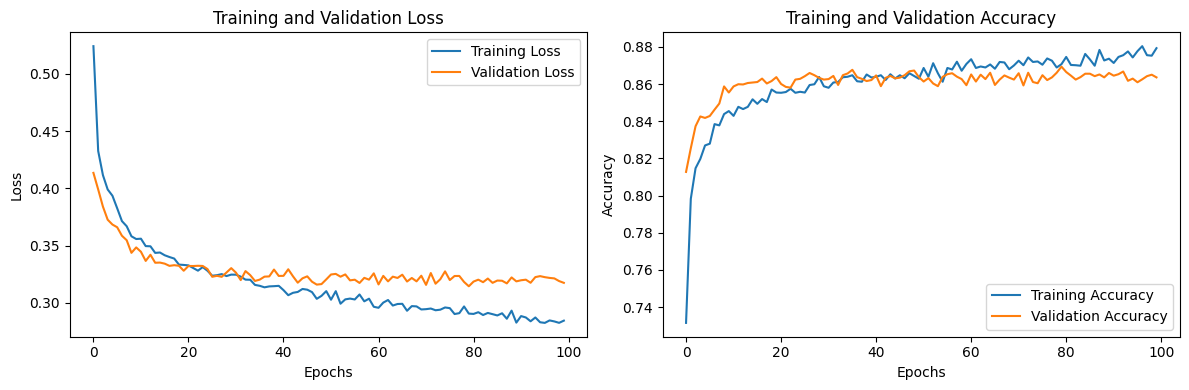


Training model with lr=0.001, num_neurons=[64, 32], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.5306 - accuracy: 0.7275 - val_loss: 0.4311 - val_accuracy: 0.8081
Epoch 2/100
232/232 [==============================] - 2s 9ms/step - loss: 0.4517 - accuracy: 0.7913 - val_loss: 0.4080 - val_accuracy: 0.8235
Epoch 3/100
232/232 [==============================] - 2s 8ms/step - loss: 0.4331 - accuracy: 0.8082 - val_loss: 0.3899 - val_accuracy: 0.8386
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4188 - accuracy: 0.8121 - val_loss: 0.3800 - val_accuracy: 0.8404
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4074 - accuracy: 0.8174 - val_loss: 0.3653 - val_accuracy: 0.8469
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3955 - accuracy: 0.8275 - val_loss: 0.3683 - val_accuracy: 0.8429
Epoch 7/100
232/232 [==============================] - 1s 3ms/step - los

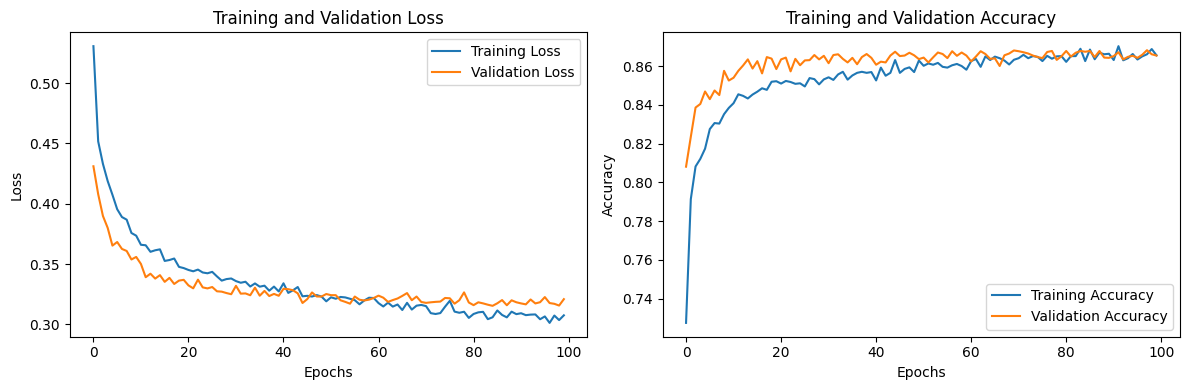


Training model with lr=0.001, num_neurons=[64, 32], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 4ms/step - loss: 0.5604 - accuracy: 0.7010 - val_loss: 0.4475 - val_accuracy: 0.7997
Epoch 2/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4703 - accuracy: 0.7700 - val_loss: 0.4167 - val_accuracy: 0.8169
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4523 - accuracy: 0.7897 - val_loss: 0.4118 - val_accuracy: 0.8199
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4364 - accuracy: 0.8011 - val_loss: 0.3868 - val_accuracy: 0.8399
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.8075 - val_loss: 0.3810 - val_accuracy: 0.8352
Epoch 6/100
232/232 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8183 - val_loss: 0.3786 - val_accuracy: 0.8356
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - los

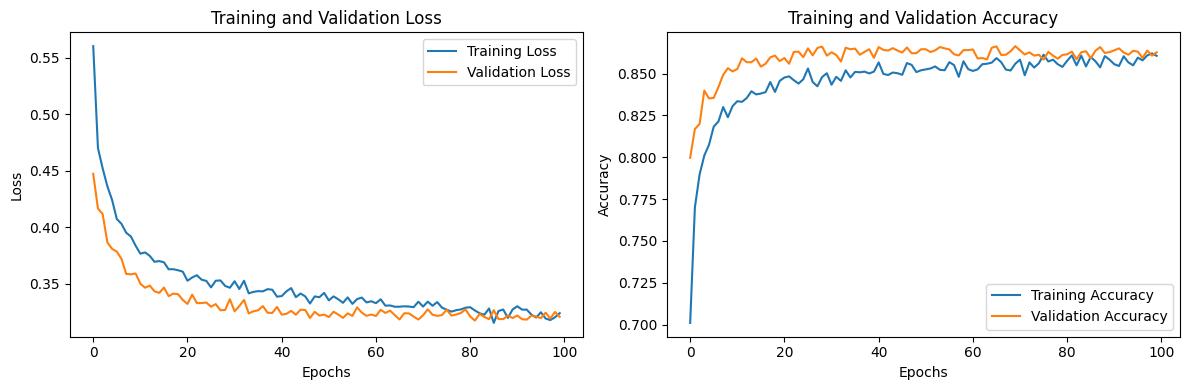


Training model with lr=0.001, num_neurons=[128, 64], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 3s 7ms/step - loss: 0.4705 - accuracy: 0.7722 - val_loss: 0.3816 - val_accuracy: 0.8374
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.8220 - val_loss: 0.3700 - val_accuracy: 0.8446
Epoch 3/100
232/232 [==============================] - 2s 7ms/step - loss: 0.3740 - accuracy: 0.8340 - val_loss: 0.3567 - val_accuracy: 0.8436
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3642 - accuracy: 0.8364 - val_loss: 0.3442 - val_accuracy: 0.8553
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3581 - accuracy: 0.8408 - val_loss: 0.3421 - val_accuracy: 0.8550
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3539 - accuracy: 0.8419 - val_loss: 0.3410 - val_accuracy: 0.8538
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - lo

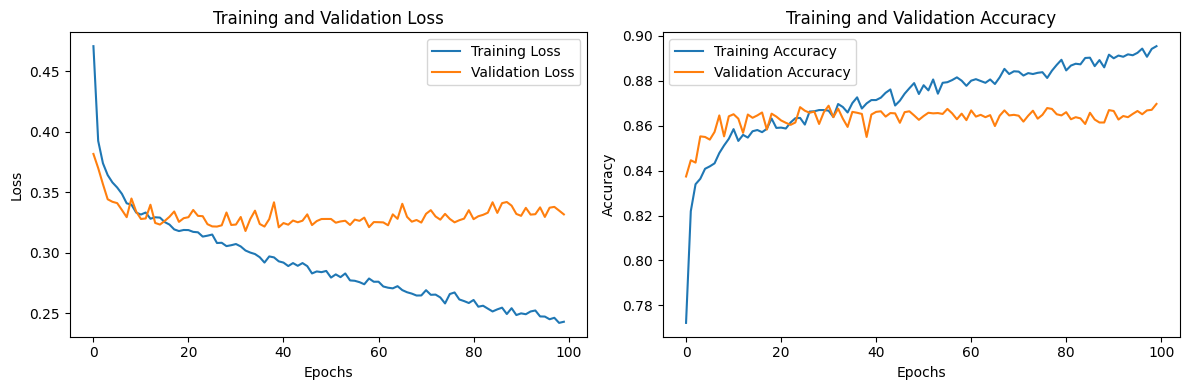


Training model with lr=0.001, num_neurons=[128, 64], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.4856 - accuracy: 0.7661 - val_loss: 0.4156 - val_accuracy: 0.8149
Epoch 2/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4093 - accuracy: 0.8171 - val_loss: 0.3799 - val_accuracy: 0.8404
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3905 - accuracy: 0.8232 - val_loss: 0.3731 - val_accuracy: 0.8352
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8282 - val_loss: 0.3641 - val_accuracy: 0.8473
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3762 - accuracy: 0.8309 - val_loss: 0.3627 - val_accuracy: 0.8466
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3674 - accuracy: 0.8381 - val_loss: 0.3484 - val_accuracy: 0.8567
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - lo

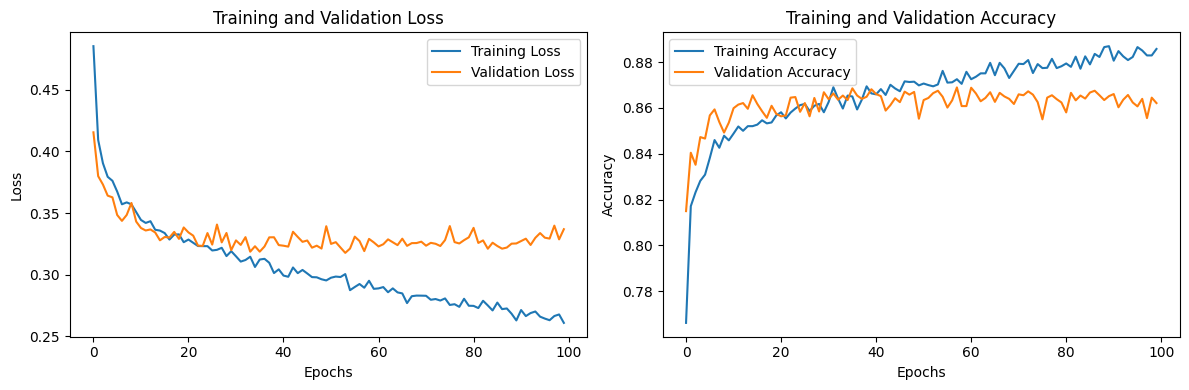


Training model with lr=0.001, num_neurons=[128, 64], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.4957 - accuracy: 0.7568 - val_loss: 0.4056 - val_accuracy: 0.8277
Epoch 2/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4304 - accuracy: 0.8044 - val_loss: 0.3899 - val_accuracy: 0.8394
Epoch 3/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4131 - accuracy: 0.8143 - val_loss: 0.3730 - val_accuracy: 0.8481
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3942 - accuracy: 0.8216 - val_loss: 0.3696 - val_accuracy: 0.8456
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3831 - accuracy: 0.8291 - val_loss: 0.3547 - val_accuracy: 0.8553
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8325 - val_loss: 0.3541 - val_accuracy: 0.8528
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - lo

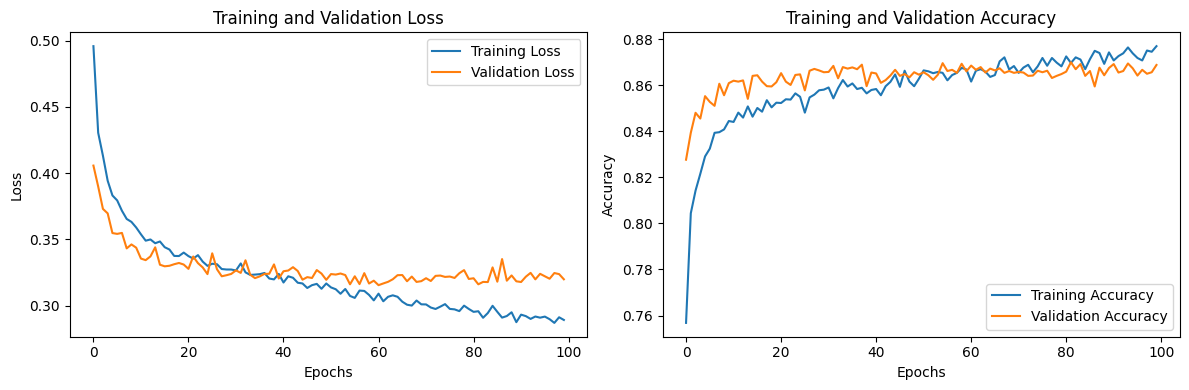


Training model with lr=0.001, num_neurons=[32, 16], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 0.5694 - accuracy: 0.7002 - val_loss: 0.4554 - val_accuracy: 0.8040
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4651 - accuracy: 0.7799 - val_loss: 0.4182 - val_accuracy: 0.8176
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.7978 - val_loss: 0.3970 - val_accuracy: 0.8302
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8100 - val_loss: 0.3812 - val_accuracy: 0.8420
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8100 - val_loss: 0.3839 - val_accuracy: 0.8373
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8201 - val_loss: 0.3801 - val_accuracy: 0.8371
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - los

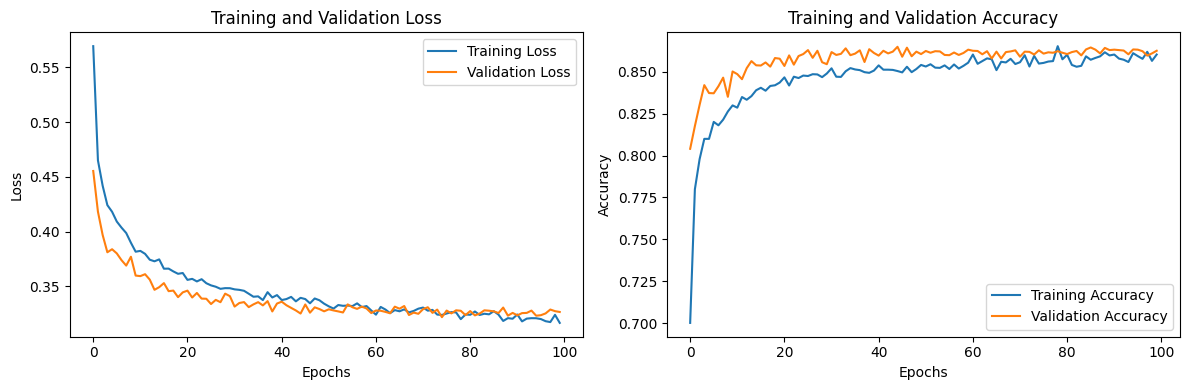


Training model with lr=0.001, num_neurons=[32, 16], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.5729 - accuracy: 0.6927 - val_loss: 0.4635 - val_accuracy: 0.8030
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4828 - accuracy: 0.7646 - val_loss: 0.4240 - val_accuracy: 0.8178
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4602 - accuracy: 0.7832 - val_loss: 0.4083 - val_accuracy: 0.8323
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4503 - accuracy: 0.7927 - val_loss: 0.4008 - val_accuracy: 0.8333
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4301 - accuracy: 0.8064 - val_loss: 0.3926 - val_accuracy: 0.8410
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4297 - accuracy: 0.8122 - val_loss: 0.3820 - val_accuracy: 0.8442
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - los

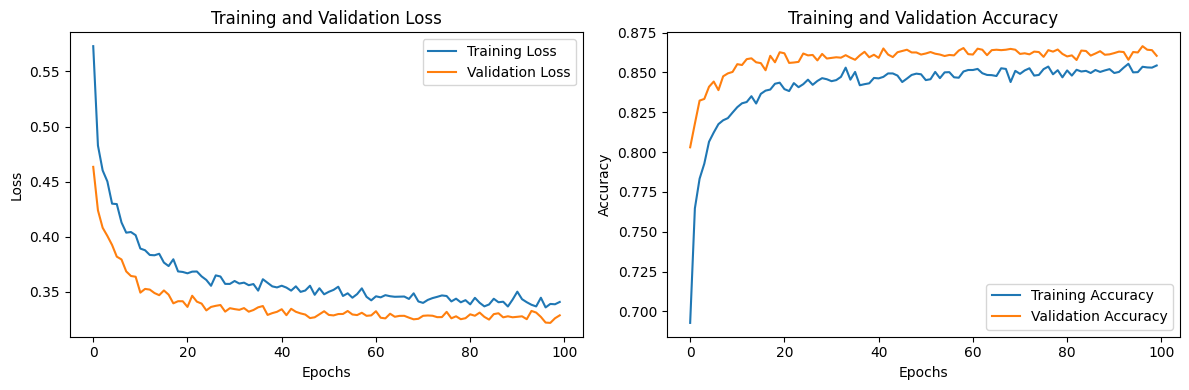


Training model with lr=0.001, num_neurons=[32, 16], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.6461 - accuracy: 0.6153 - val_loss: 0.5549 - val_accuracy: 0.7819
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.5337 - accuracy: 0.7342 - val_loss: 0.4492 - val_accuracy: 0.8034
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4955 - accuracy: 0.7644 - val_loss: 0.4373 - val_accuracy: 0.8149
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4691 - accuracy: 0.7807 - val_loss: 0.4286 - val_accuracy: 0.8177
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4588 - accuracy: 0.7909 - val_loss: 0.4136 - val_accuracy: 0.8199
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4489 - accuracy: 0.7951 - val_loss: 0.3971 - val_accuracy: 0.8324
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - los

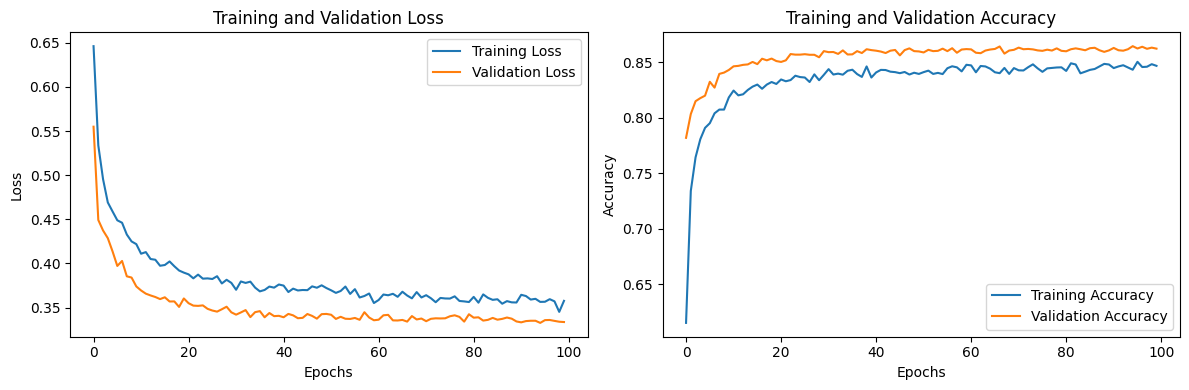


Training model with lr=0.01, num_neurons=[64, 32], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.5099 - accuracy: 0.7522 - val_loss: 0.4224 - val_accuracy: 0.8147
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4281 - accuracy: 0.8050 - val_loss: 0.3809 - val_accuracy: 0.8404
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4061 - accuracy: 0.8175 - val_loss: 0.3754 - val_accuracy: 0.8386
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3945 - accuracy: 0.8232 - val_loss: 0.3721 - val_accuracy: 0.8446
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3837 - accuracy: 0.8279 - val_loss: 0.3595 - val_accuracy: 0.8487
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3749 - accuracy: 0.8346 - val_loss: 0.3562 - val_accuracy: 0.8521
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - loss

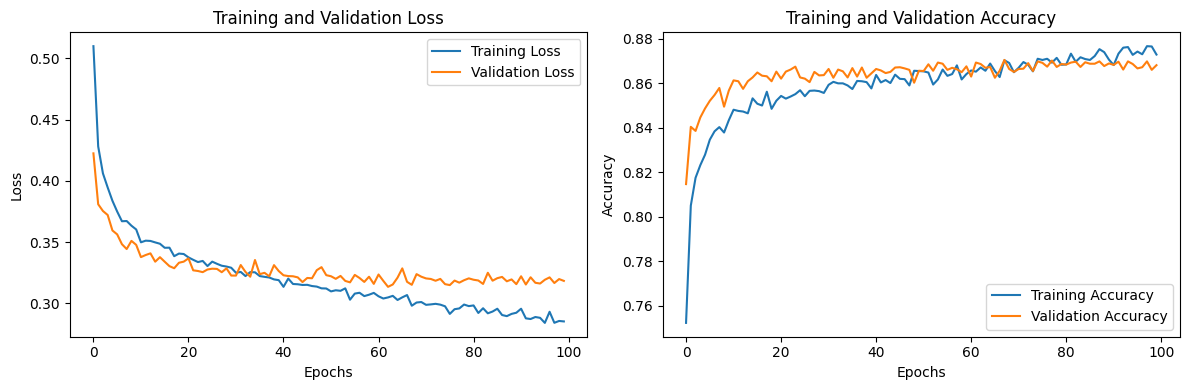


Training model with lr=0.01, num_neurons=[64, 32], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 3s 7ms/step - loss: 0.5293 - accuracy: 0.7252 - val_loss: 0.4233 - val_accuracy: 0.8113
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.7885 - val_loss: 0.3979 - val_accuracy: 0.8308
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4153 - accuracy: 0.8137 - val_loss: 0.3842 - val_accuracy: 0.8378
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4083 - accuracy: 0.8195 - val_loss: 0.3730 - val_accuracy: 0.8452
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4014 - accuracy: 0.8233 - val_loss: 0.3795 - val_accuracy: 0.8357
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3923 - accuracy: 0.8234 - val_loss: 0.3653 - val_accuracy: 0.8490
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss

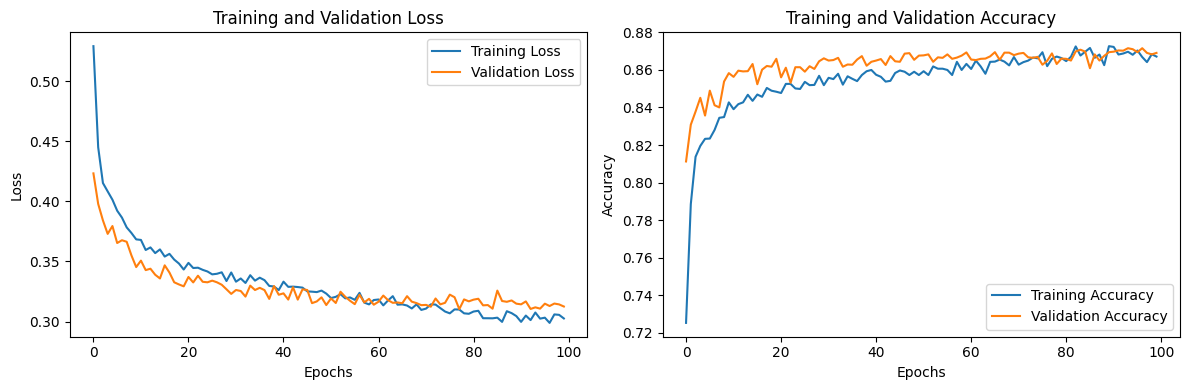


Training model with lr=0.01, num_neurons=[64, 32], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 0.5563 - accuracy: 0.6984 - val_loss: 0.4575 - val_accuracy: 0.7960
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7810 - val_loss: 0.4243 - val_accuracy: 0.8148
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.7932 - val_loss: 0.4074 - val_accuracy: 0.8211
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4355 - accuracy: 0.8093 - val_loss: 0.3934 - val_accuracy: 0.8320
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8168 - val_loss: 0.3830 - val_accuracy: 0.8336
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8205 - val_loss: 0.3722 - val_accuracy: 0.8465
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss

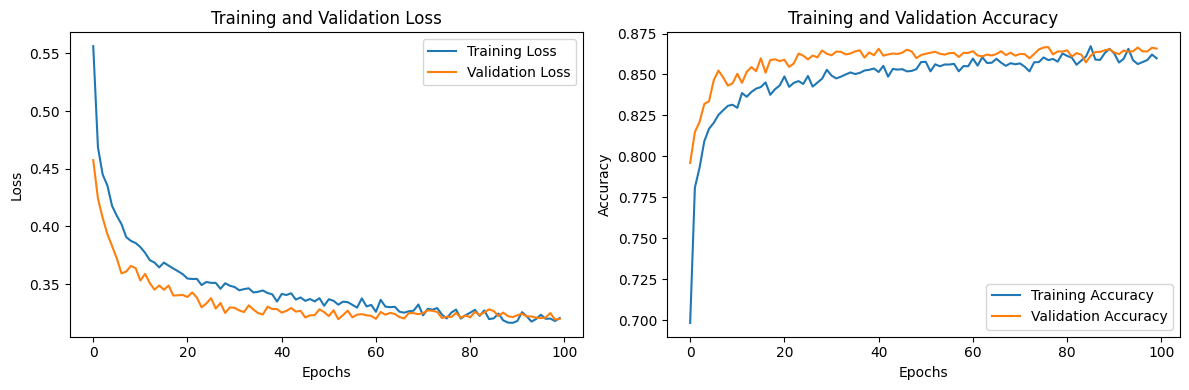


Training model with lr=0.01, num_neurons=[128, 64], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 0.4618 - accuracy: 0.7780 - val_loss: 0.3945 - val_accuracy: 0.8256
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3966 - accuracy: 0.8210 - val_loss: 0.4075 - val_accuracy: 0.8136
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3781 - accuracy: 0.8313 - val_loss: 0.3605 - val_accuracy: 0.8473
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8394 - val_loss: 0.3486 - val_accuracy: 0.8513
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3591 - accuracy: 0.8410 - val_loss: 0.3447 - val_accuracy: 0.8598
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3507 - accuracy: 0.8466 - val_loss: 0.3542 - val_accuracy: 0.8475
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - los

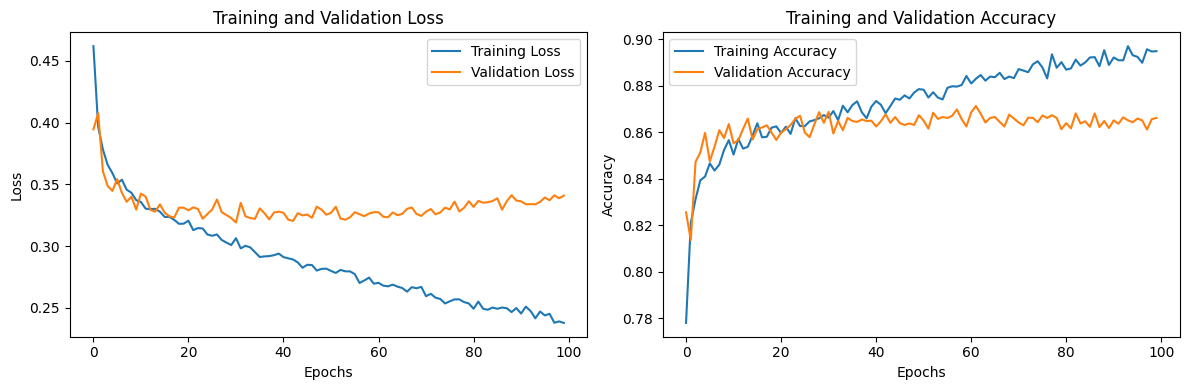


Training model with lr=0.01, num_neurons=[128, 64], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.4832 - accuracy: 0.7621 - val_loss: 0.3974 - val_accuracy: 0.8245
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4174 - accuracy: 0.8160 - val_loss: 0.3797 - val_accuracy: 0.8445
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3953 - accuracy: 0.8211 - val_loss: 0.3677 - val_accuracy: 0.8421
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3846 - accuracy: 0.8282 - val_loss: 0.3591 - val_accuracy: 0.8506
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8298 - val_loss: 0.3457 - val_accuracy: 0.8588
Epoch 6/100
232/232 [==============================] - 2s 7ms/step - loss: 0.3711 - accuracy: 0.8364 - val_loss: 0.3466 - val_accuracy: 0.8579
Epoch 7/100
232/232 [==============================] - 2s 7ms/step - los

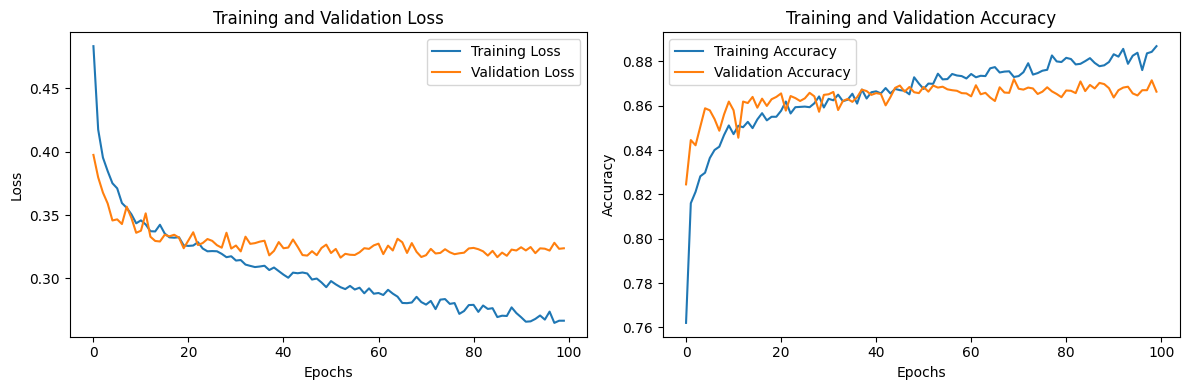


Training model with lr=0.01, num_neurons=[128, 64], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.5053 - accuracy: 0.7548 - val_loss: 0.4062 - val_accuracy: 0.8236
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.8060 - val_loss: 0.3875 - val_accuracy: 0.8311
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4065 - accuracy: 0.8205 - val_loss: 0.3662 - val_accuracy: 0.8445
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3962 - accuracy: 0.8180 - val_loss: 0.3645 - val_accuracy: 0.8466
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3805 - accuracy: 0.8334 - val_loss: 0.3603 - val_accuracy: 0.8507
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3783 - accuracy: 0.8310 - val_loss: 0.3565 - val_accuracy: 0.8508
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - los

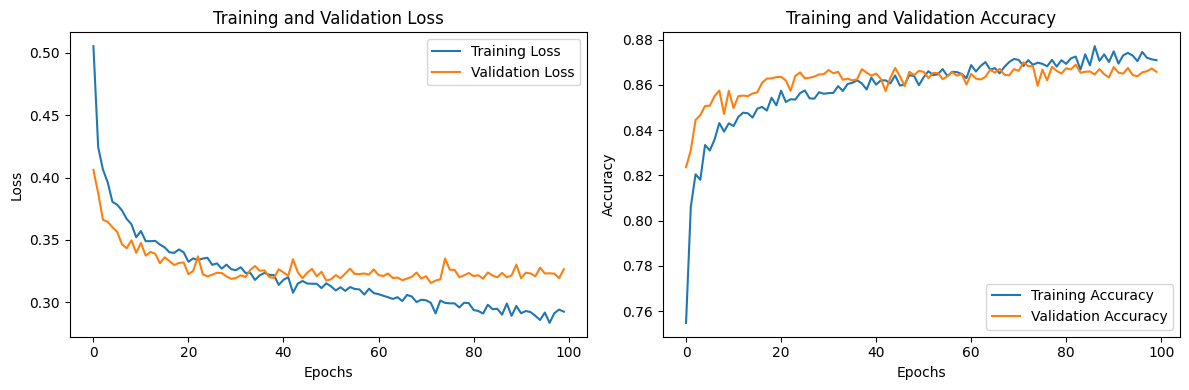


Training model with lr=0.01, num_neurons=[32, 16], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 3s 5ms/step - loss: 0.5572 - accuracy: 0.7105 - val_loss: 0.4705 - val_accuracy: 0.7950
Epoch 2/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4633 - accuracy: 0.7816 - val_loss: 0.4055 - val_accuracy: 0.8249
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4394 - accuracy: 0.8004 - val_loss: 0.3944 - val_accuracy: 0.8354
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4221 - accuracy: 0.8139 - val_loss: 0.3796 - val_accuracy: 0.8407
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4133 - accuracy: 0.8131 - val_loss: 0.3770 - val_accuracy: 0.8399
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4044 - accuracy: 0.8171 - val_loss: 0.3763 - val_accuracy: 0.8445
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - loss

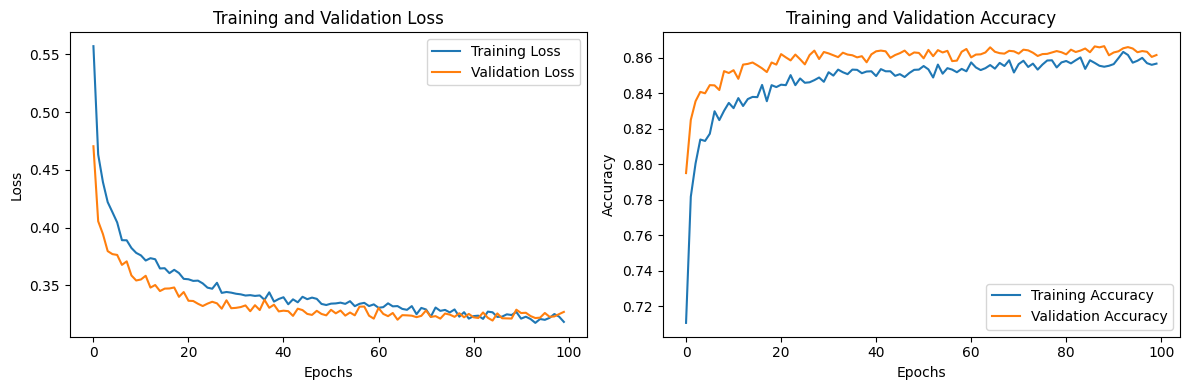


Training model with lr=0.01, num_neurons=[32, 16], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.6229 - accuracy: 0.6458 - val_loss: 0.5082 - val_accuracy: 0.7814
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.5036 - accuracy: 0.7547 - val_loss: 0.4503 - val_accuracy: 0.7988
Epoch 3/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4775 - accuracy: 0.7746 - val_loss: 0.4294 - val_accuracy: 0.8148
Epoch 4/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4613 - accuracy: 0.7885 - val_loss: 0.4182 - val_accuracy: 0.8228
Epoch 5/100
232/232 [==============================] - 2s 6ms/step - loss: 0.4415 - accuracy: 0.7947 - val_loss: 0.4023 - val_accuracy: 0.8327
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4383 - accuracy: 0.7990 - val_loss: 0.3889 - val_accuracy: 0.8377
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss

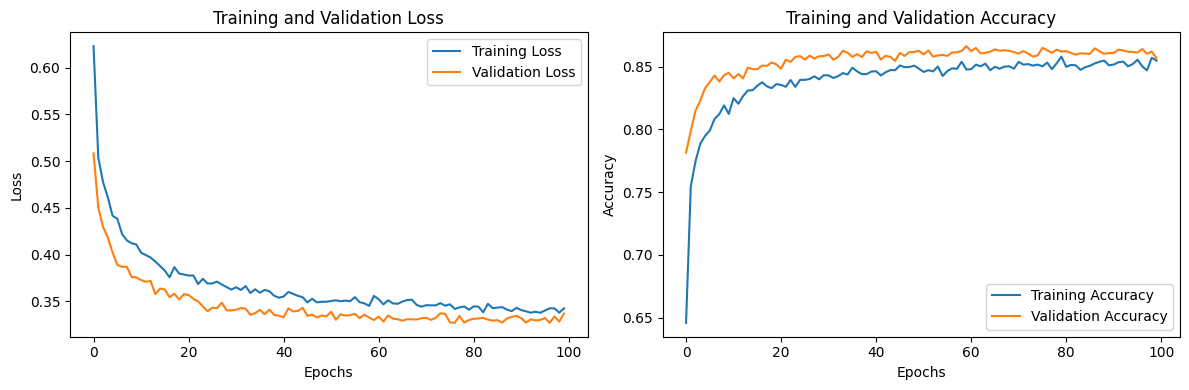


Training model with lr=0.01, num_neurons=[32, 16], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.6304 - accuracy: 0.6380 - val_loss: 0.5100 - val_accuracy: 0.7864
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.5296 - accuracy: 0.7373 - val_loss: 0.4658 - val_accuracy: 0.8014
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4965 - accuracy: 0.7569 - val_loss: 0.4385 - val_accuracy: 0.8137
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4776 - accuracy: 0.7712 - val_loss: 0.4270 - val_accuracy: 0.8223
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4655 - accuracy: 0.7881 - val_loss: 0.4118 - val_accuracy: 0.8297
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4510 - accuracy: 0.7932 - val_loss: 0.4081 - val_accuracy: 0.8328
Epoch 7/100
232/232 [==============================] - 2s 7ms/step - loss

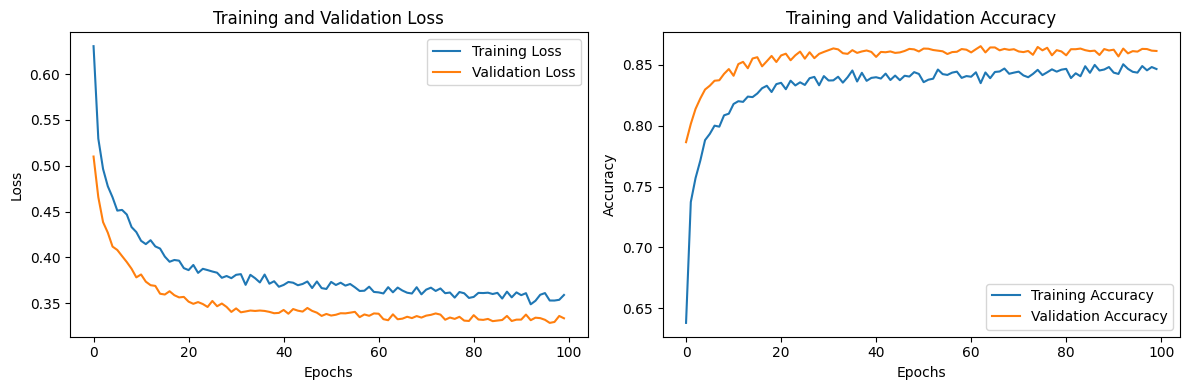


Training model with lr=0.1, num_neurons=[64, 32], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.5024 - accuracy: 0.7506 - val_loss: 0.4270 - val_accuracy: 0.8109
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4264 - accuracy: 0.8033 - val_loss: 0.3931 - val_accuracy: 0.8320
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8190 - val_loss: 0.3807 - val_accuracy: 0.8435
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3962 - accuracy: 0.8272 - val_loss: 0.3700 - val_accuracy: 0.8449
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3844 - accuracy: 0.8286 - val_loss: 0.3755 - val_accuracy: 0.8377
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8314 - val_loss: 0.3516 - val_accuracy: 0.8570
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - loss:

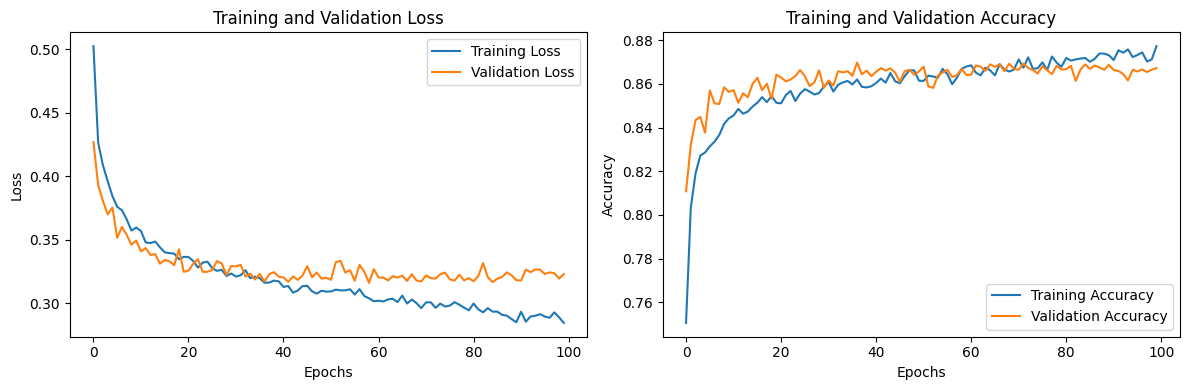


Training model with lr=0.1, num_neurons=[64, 32], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 0.5291 - accuracy: 0.7285 - val_loss: 0.4324 - val_accuracy: 0.8010
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4561 - accuracy: 0.7818 - val_loss: 0.4097 - val_accuracy: 0.8194
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy: 0.8050 - val_loss: 0.4023 - val_accuracy: 0.8262
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8128 - val_loss: 0.3809 - val_accuracy: 0.8382
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8226 - val_loss: 0.3776 - val_accuracy: 0.8391
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3966 - accuracy: 0.8240 - val_loss: 0.3707 - val_accuracy: 0.8471
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss:

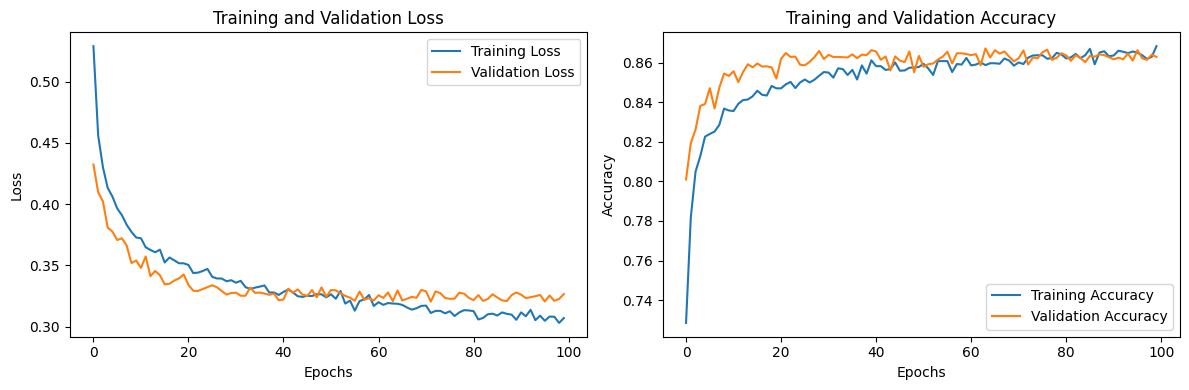


Training model with lr=0.1, num_neurons=[64, 32], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.5576 - accuracy: 0.7083 - val_loss: 0.4350 - val_accuracy: 0.8101
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4592 - accuracy: 0.7828 - val_loss: 0.4184 - val_accuracy: 0.8174
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.8047 - val_loss: 0.4037 - val_accuracy: 0.8212
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4251 - accuracy: 0.8048 - val_loss: 0.3896 - val_accuracy: 0.8289
Epoch 5/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4188 - accuracy: 0.8139 - val_loss: 0.3853 - val_accuracy: 0.8387
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4037 - accuracy: 0.8190 - val_loss: 0.3741 - val_accuracy: 0.8438
Epoch 7/100
232/232 [==============================] - 2s 7ms/step - loss:

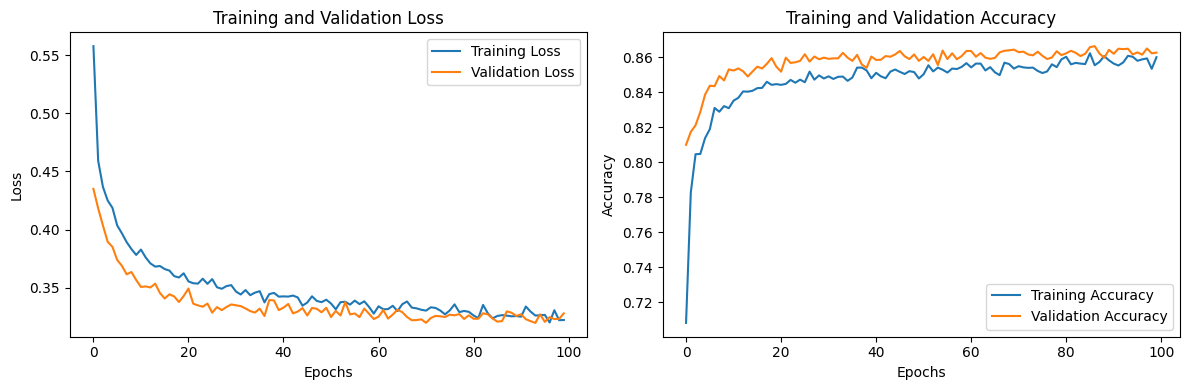


Training model with lr=0.1, num_neurons=[128, 64], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.4695 - accuracy: 0.7745 - val_loss: 0.4216 - val_accuracy: 0.8128
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3951 - accuracy: 0.8202 - val_loss: 0.3744 - val_accuracy: 0.8387
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3766 - accuracy: 0.8333 - val_loss: 0.3715 - val_accuracy: 0.8433
Epoch 4/100
232/232 [==============================] - 2s 7ms/step - loss: 0.3693 - accuracy: 0.8345 - val_loss: 0.3513 - val_accuracy: 0.8513
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3610 - accuracy: 0.8396 - val_loss: 0.3637 - val_accuracy: 0.8348
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3548 - accuracy: 0.8421 - val_loss: 0.3457 - val_accuracy: 0.8542
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - loss

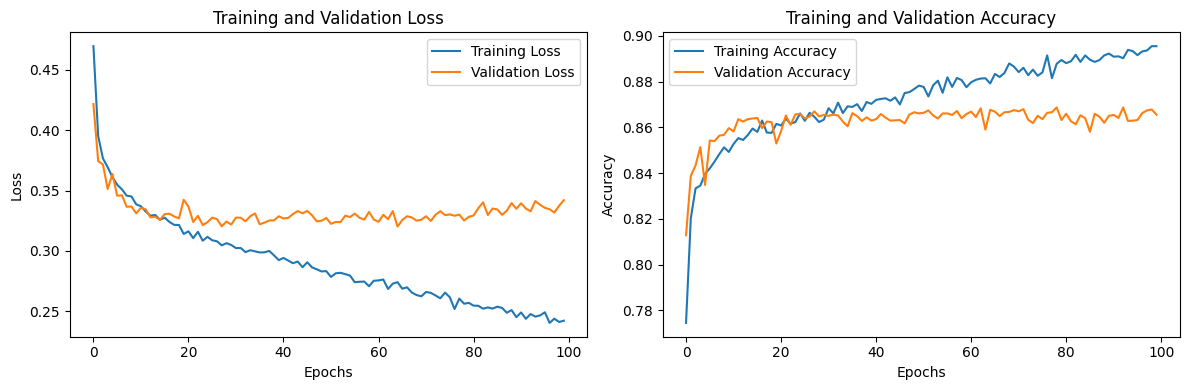


Training model with lr=0.1, num_neurons=[128, 64], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.7565 - val_loss: 0.4132 - val_accuracy: 0.8252
Epoch 2/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4150 - accuracy: 0.8120 - val_loss: 0.3910 - val_accuracy: 0.8320
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3940 - accuracy: 0.8209 - val_loss: 0.3591 - val_accuracy: 0.8536
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3846 - accuracy: 0.8307 - val_loss: 0.3691 - val_accuracy: 0.8408
Epoch 5/100
232/232 [==============================] - 2s 7ms/step - loss: 0.3732 - accuracy: 0.8322 - val_loss: 0.3614 - val_accuracy: 0.8502
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.3638 - accuracy: 0.8399 - val_loss: 0.3545 - val_accuracy: 0.8503
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss

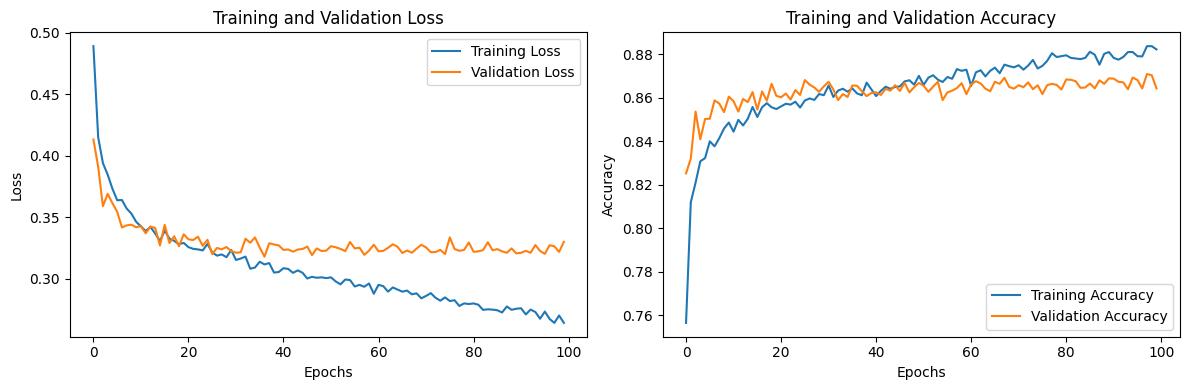


Training model with lr=0.1, num_neurons=[128, 64], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 3s 8ms/step - loss: 0.5049 - accuracy: 0.7507 - val_loss: 0.4058 - val_accuracy: 0.8237
Epoch 2/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.3843 - val_accuracy: 0.8399
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8135 - val_loss: 0.3764 - val_accuracy: 0.8398
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3939 - accuracy: 0.8265 - val_loss: 0.3576 - val_accuracy: 0.8533
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3831 - accuracy: 0.8317 - val_loss: 0.3639 - val_accuracy: 0.8390
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3764 - accuracy: 0.8340 - val_loss: 0.3475 - val_accuracy: 0.8559
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss

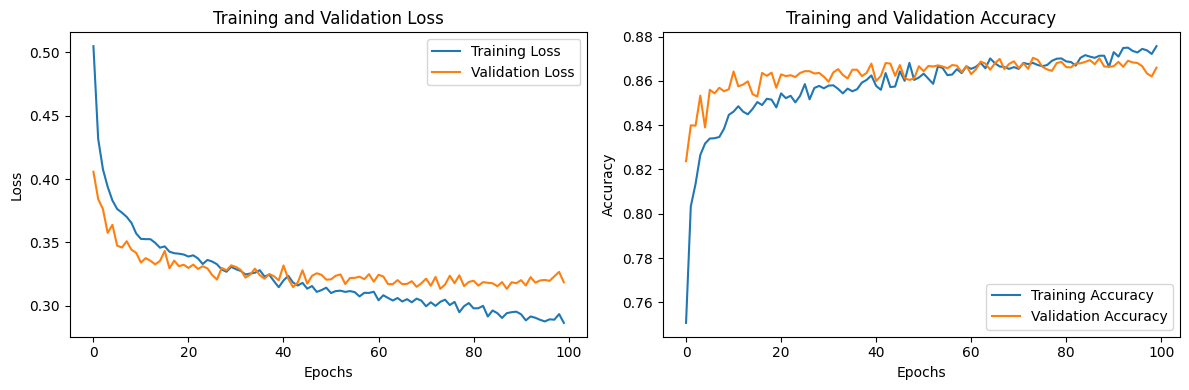


Training model with lr=0.1, num_neurons=[32, 16], dropout_rate=0.2
Epoch 1/100
232/232 [==============================] - 2s 6ms/step - loss: 0.5494 - accuracy: 0.7112 - val_loss: 0.4481 - val_accuracy: 0.7997
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4677 - accuracy: 0.7743 - val_loss: 0.4260 - val_accuracy: 0.8207
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4416 - accuracy: 0.7924 - val_loss: 0.4099 - val_accuracy: 0.8240
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4285 - accuracy: 0.8048 - val_loss: 0.3925 - val_accuracy: 0.8315
Epoch 5/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4157 - accuracy: 0.8070 - val_loss: 0.3875 - val_accuracy: 0.8356
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8206 - val_loss: 0.3832 - val_accuracy: 0.8354
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss:

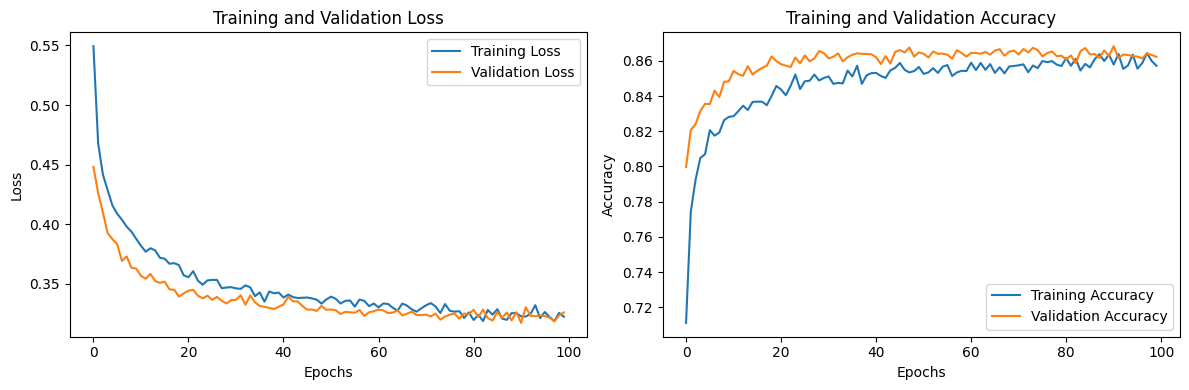


Training model with lr=0.1, num_neurons=[32, 16], dropout_rate=0.3
Epoch 1/100
232/232 [==============================] - 3s 7ms/step - loss: 0.5908 - accuracy: 0.6789 - val_loss: 0.4702 - val_accuracy: 0.7935
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4807 - accuracy: 0.7649 - val_loss: 0.4367 - val_accuracy: 0.8099
Epoch 3/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4539 - accuracy: 0.7832 - val_loss: 0.4162 - val_accuracy: 0.8207
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4456 - accuracy: 0.7957 - val_loss: 0.3978 - val_accuracy: 0.8322
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4317 - accuracy: 0.7998 - val_loss: 0.3983 - val_accuracy: 0.8341
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4257 - accuracy: 0.8098 - val_loss: 0.3931 - val_accuracy: 0.8325
Epoch 7/100
232/232 [==============================] - 2s 7ms/step - loss:

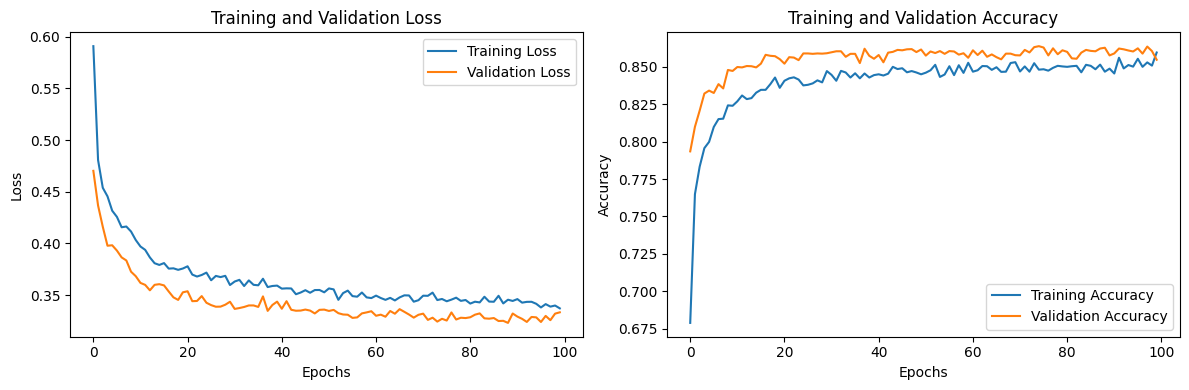


Training model with lr=0.1, num_neurons=[32, 16], dropout_rate=0.4
Epoch 1/100
232/232 [==============================] - 2s 5ms/step - loss: 0.6186 - accuracy: 0.6292 - val_loss: 0.4913 - val_accuracy: 0.7831
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.5233 - accuracy: 0.7315 - val_loss: 0.4488 - val_accuracy: 0.7938
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 0.4886 - accuracy: 0.7665 - val_loss: 0.4354 - val_accuracy: 0.8026
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4842 - accuracy: 0.7675 - val_loss: 0.4341 - val_accuracy: 0.8089
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4667 - accuracy: 0.7804 - val_loss: 0.4225 - val_accuracy: 0.8226
Epoch 6/100
232/232 [==============================] - 2s 7ms/step - loss: 0.4619 - accuracy: 0.7872 - val_loss: 0.4048 - val_accuracy: 0.8297
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss:

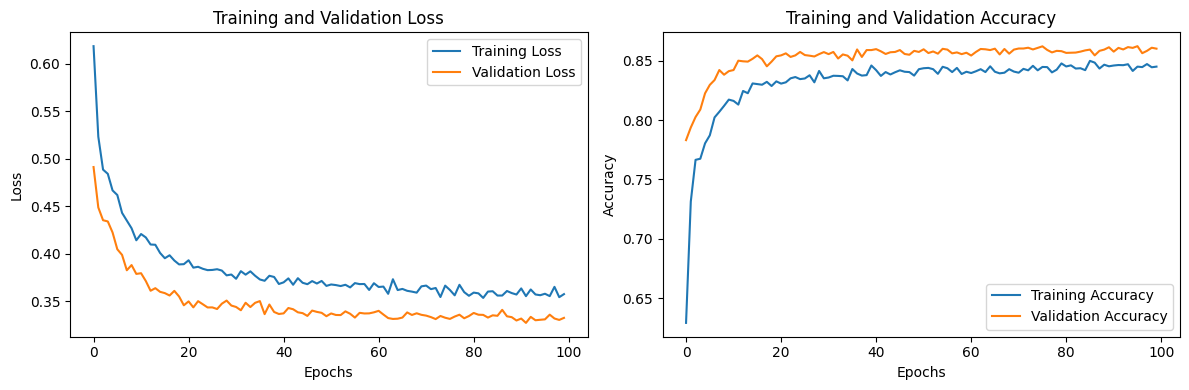

In [76]:
learning_rates = [0.001, 0.01, 0.1]
num_neurons_list = [[64, 32], [128, 64], [32, 16]]
dropout_rates = [0.2, 0.3, 0.4]

for lr in learning_rates:
    for num_neurons in num_neurons_list:
        for dropout_rate in dropout_rates:
            print(f"Training model with lr={lr}, num_neurons={num_neurons}, dropout_rate={dropout_rate}")
            nn = NeuralNetwork(input_shape=(10,), layer_config=[(num_neurons[0], 'relu'), (num_neurons[1], 'relu')], dropout_rate=dropout_rate)
            history = nn.train(
                train_x, train_y,
                epochs=100,
                batch_size=32,
                validation_data=(val_test_x, val_test_y),
            )
            print("Evaluation on test data:")
            evaluation_result = nn.evaluate(test_x, test_y)
            print(f"Test Loss: {evaluation_result[0]}, Test Accuracy: {evaluation_result[1]}")
            #print()
            # Plot training and validation loss
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('Training and Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()

            # Plot training and validation accuracy
            plt.subplot(1, 2, 2)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title('Training and Validation Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.tight_layout()
            plt.show()
            print()


In [73]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Binary CorssEntropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

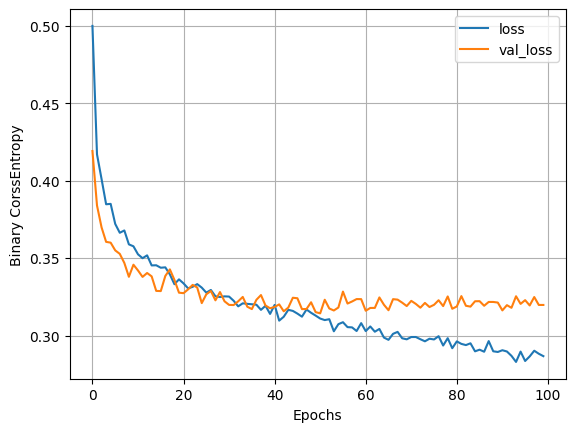

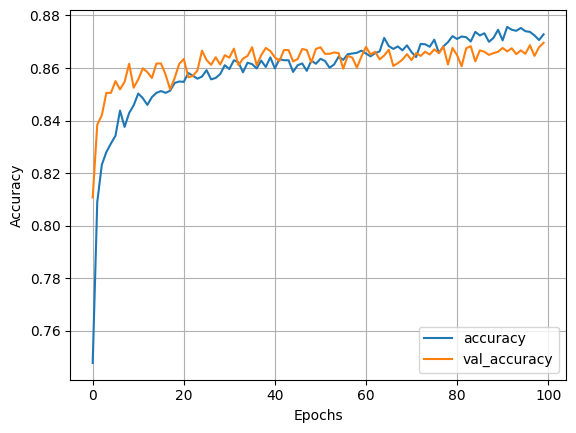

In [74]:
plot_loss(history)
plot_accuracy(history)